In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sbn
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [2]:
data=cifar10.load_data();

In [3]:
(X_train,y_train),(X_test,y_test)=data
X_train=X_train/255
X_test=X_test/255

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

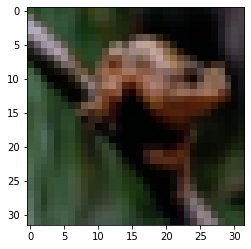

In [7]:
plt.imshow(X_train[5000])

In [8]:
y_test_c=to_categorical(y_test)

In [9]:
y_train_c=to_categorical(y_train)

In [10]:
32*32*3

3072

In [11]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
#there are lots of data points (3072) so lets apply 2 convlutional layers
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
          
model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])



In [12]:
early_stop=EarlyStopping(monitor="val_loss",patience=2)
model.fit(X_train,y_train_c,callbacks=[early_stop],epochs=10,validation_data=(X_test,y_test_c))

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4831 - accuracy: 0.4649 - val_loss: 1.2657 - val_accuracy: 0.5415
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1520 - accuracy: 0.5922 - val_loss: 1.1466 - val_accuracy: 0.5918
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9970 - accuracy: 0.6506 - val_loss: 1.0333 - val_accuracy: 0.6381
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8917 - accuracy: 0.6894 - val_loss: 0.9727 - val_accuracy: 0.6635
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8023 - accuracy: 0.7183 - val_loss: 0.9623 - val_accuracy: 0.6699
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7219 - accuracy: 0.7465 - val_loss: 0.9670 - val_accuracy: 0.6672
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6471 - accuracy: 0.7719 - val_loss: 0.9668 -

In [13]:
results=pd.DataFrame(model.history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,1.483147,0.46494,1.265721,0.5415
1,1.151988,0.59218,1.146586,0.5918
2,0.996985,0.65060,1.033321,0.6381
3,0.891714,0.68936,0.972667,0.6635
4,0.802299,0.71828,0.962336,0.6699
5,0.721851,0.74648,0.966971,0.6672
6,0.647105,0.77194,0.966819,0.6767


<AxesSubplot:>

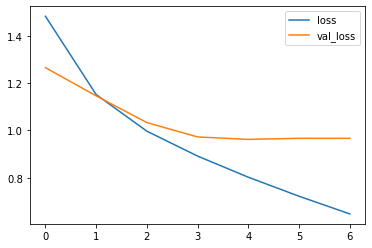

In [14]:
results[["loss","val_loss"]].plot()

<AxesSubplot:>

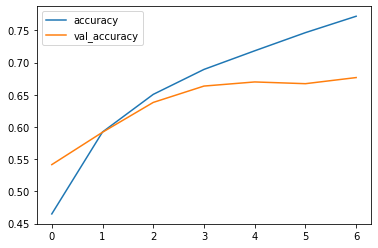

In [15]:
results[["accuracy","val_accuracy"]].plot()

In [16]:
predictions=model.predict(X_test)

In [17]:
predictions=np.argmax(predictions,-1)

In [18]:
predictions

array([3, 8, 8, ..., 5, 1, 7])

In [19]:
confusion_matrix(y_test,predictions)

array([[709,  16,  64,  30,  32,  10,  12,  15,  76,  36],
       [ 28, 778,   5,  12,  16,   8,   8,   5,  40, 100],
       [ 51,  11, 534,  73, 117,  93,  44,  50,  19,   8],
       [ 14,   9,  53, 487,  82, 220,  49,  54,  14,  18],
       [ 11,   2,  56,  85, 693,  64,  23,  45,  18,   3],
       [ 15,   4,  42, 169,  58, 611,  21,  61,   9,  10],
       [  2,   7,  45,  88,  69,  47, 715,  15,   9,   3],
       [ 12,   5,  21,  47, 101,  76,   6, 718,   4,  10],
       [ 68,  42,  17,  18,  26,   9,   6,   7, 770,  37],
       [ 29,  71,  14,  30,  13,  14,  13,  23,  41, 752]])

In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.71      0.73      1000
           1       0.82      0.78      0.80      1000
           2       0.63      0.53      0.58      1000
           3       0.47      0.49      0.48      1000
           4       0.57      0.69      0.63      1000
           5       0.53      0.61      0.57      1000
           6       0.80      0.71      0.75      1000
           7       0.72      0.72      0.72      1000
           8       0.77      0.77      0.77      1000
           9       0.77      0.75      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [21]:
test_image=X_test[0]

In [22]:
y_test[400]

array([9], dtype=uint8)

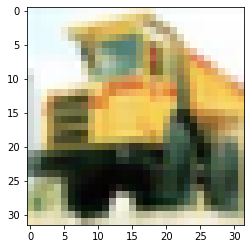

In [23]:
plt.imshow(X_test[400])

In [24]:
X_test[400].shape

(32, 32, 3)

In [25]:
X_image=X_test[400].reshape(1,32,32,3)

In [26]:
y_predict=model.predict(X_image)

In [27]:
np.argmax(y_predict)

9